In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [45]:
plt.style.use('fivethirtyeight')

In [2]:
car_data = pd.read_csv('car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.drop('Car_Name', axis=1, inplace=True)

In [5]:
car_data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
cat_cols= ['Fuel_Type','Seller_Type', 'Transmission', 'Owner']

In [9]:
for each in cat_cols:
    print(each, car_data[each].unique())

Fuel_Type ['Petrol' 'Diesel' 'CNG']
Seller_Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner [0 1 3]


In [10]:
car_data.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [22]:
from datetime import datetime

In [40]:
def convertToDatetimeObj(y):
    year = str(y)
    date_time_obj = datetime.strptime(year, '%Y')
    year_diff = datetime.today().year - date_time_obj.year
    return year_diff

In [41]:
car_data['Year'] = car_data['Year'].apply(convertToDatetimeObj)

In [43]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,8,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,9,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,5,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,11,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,8,4.60,6.87,42450,Diesel,Dealer,Manual,0


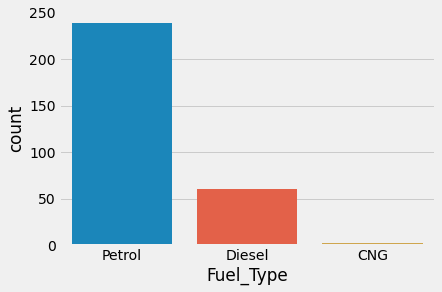

In [46]:
sns.countplot(x='Fuel_Type', data=car_data)
plt.show()

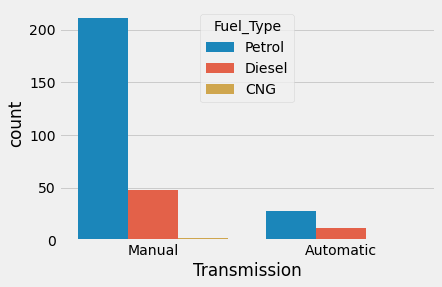

In [48]:
sns.countplot(x='Transmission', data=car_data, hue='Fuel_Type')
plt.show()

In [50]:
car_model_data = pd.get_dummies(data=car_data, columns=cat_cols, drop_first=True)

In [51]:
car_model_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,8,3.35,5.59,27000,0,1,0,1,0,0
1,9,4.75,9.54,43000,1,0,0,1,0,0
2,5,7.25,9.85,6900,0,1,0,1,0,0
3,11,2.85,4.15,5200,0,1,0,1,0,0
4,8,4.60,6.87,42450,1,0,0,1,0,0


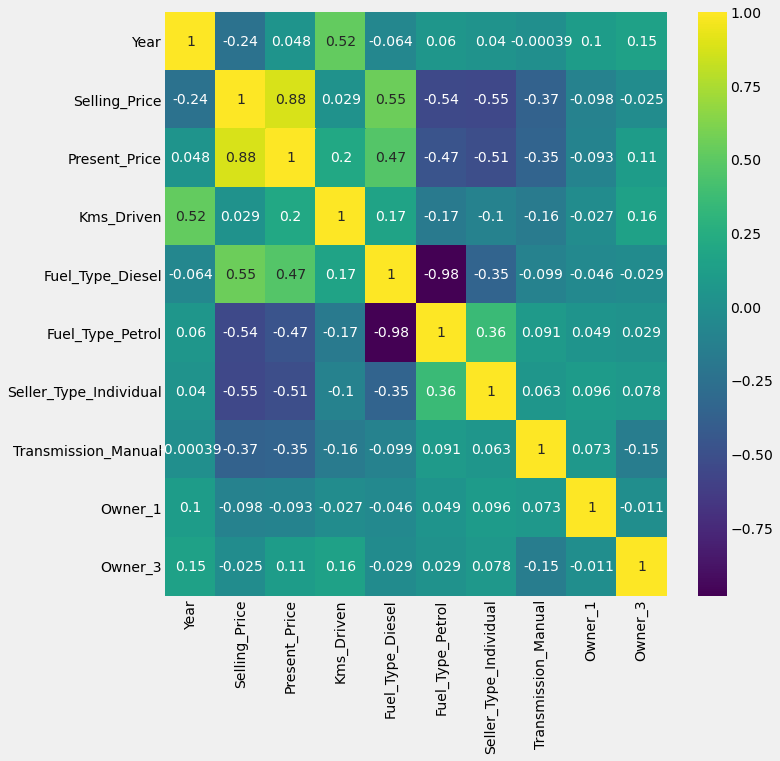

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(car_model_data.corr(), cmap='viridis', annot=True)
plt.show()

In [60]:
X = car_model_data.drop('Selling_Price', axis=1)
y = car_model_data['Selling_Price']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lm_model = LinearRegression()

In [65]:
lm_model.fit(X_train, y_train)

LinearRegression()

In [66]:
prediction = lm_model.predict(X_test)

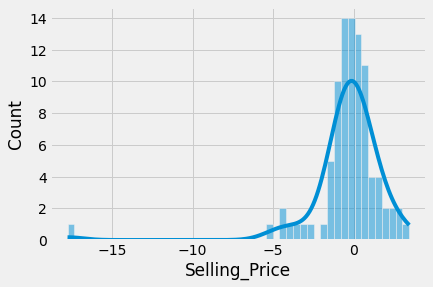

In [72]:
sns.histplot(y_test-prediction, bins=50, kde=True)
plt.show()

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
print('MAE =', mean_absolute_error(y_test, prediction))
print('MSE =', mean_squared_error(y_test, prediction))
print('RMAS =', np.sqrt(mean_absolute_error(y_test, prediction)))

MAE = 1.2607341955622668
MSE = 5.758988800999157
RMAS = 1.122824205101701
